<a href="https://colab.research.google.com/github/aky360/A.I./blob/main/Data%20Science/Data%20Analysis/Survey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1 - Load the dataset into a pandas dataframe. Name the variable as “survey”.**

**Question 2 - How many samples were collected on each day?**

**Question 3 - What proportion of the total respondents were aged less than 45?**

**Question 4 - Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The dataframe should look like this after the column creation.**

**Question 5 - How many samples were collected for each age-group? Which age-group had the most samples?**

**Question 6 - What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?**

**Question 7 - For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.**

**Question 8 - In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.**

**Question 9 - Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.
Answer - survey.pivot_table(index = 'Past_Vote', columns = 'Vote_Now', values = 'response_id', aggfunc = 'count')**

**Question 10 - Repeat the above question with the cell values as the sum of “weight”.**

**Question 11 - Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.**

**Question 12 - Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.**

**Question 13 - Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/aky360/A.I./main/Data%20Science/Data%20Analysis/Datasets/Survey%20Dataset%20-%20Technical%20Interview.csv"
survey = pd.read_csv(url)
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,6-1-2017,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,6-1-2017,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


In [3]:
print(survey.shape, ' => ', survey.size)
print(survey.index)
print(survey.columns)
print(survey.columns.size)
print(survey.dtypes)

(6867, 14)  =>  96138
RangeIndex(start=0, stop=6867, step=1)
Index(['response_id', 'collection_date', 'urban_rural', 'education', 'income',
       'Vote_Now', 'Past_Vote', 'CM_satisfaction', 'MLA_satisfaction', 'age',
       'gender', 'assembly_no', 'category', 'weight'],
      dtype='object')
14
response_id           int64
collection_date      object
urban_rural          object
education            object
income               object
Vote_Now             object
Past_Vote            object
CM_satisfaction      object
MLA_satisfaction     object
age                  object
gender               object
assembly_no           int64
category             object
weight              float64
dtype: object


In [4]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   response_id       6867 non-null   int64  
 1   collection_date   6867 non-null   object 
 2   urban_rural       6867 non-null   object 
 3   education         6867 non-null   object 
 4   income            6867 non-null   object 
 5   Vote_Now          6867 non-null   object 
 6   Past_Vote         6867 non-null   object 
 7   CM_satisfaction   6867 non-null   object 
 8   MLA_satisfaction  6867 non-null   object 
 9   age               6867 non-null   object 
 10  gender            6867 non-null   object 
 11  assembly_no       6867 non-null   int64  
 12  category          6867 non-null   object 
 13  weight            6867 non-null   float64
dtypes: float64(1), int64(2), object(11)
memory usage: 751.2+ KB


In [5]:
survey.describe()

,response_id,assembly_no,weight
count,6867.000000,6867.000000,6867.000000
mean,3434.000000,130.843017,0.995800
std,1982.476482,66.420060,2.074578
min,1.000000,1.000000,0.001089
25%,1717.500000,79.000000,0.137896
50%,3434.000000,135.000000,0.369789
75%,5150.500000,184.000000,0.956474
max,6867.000000,243.000000,51.075631


In [6]:
survey.isnull().sum()

response_id         0
collection_date     0
urban_rural         0
education           0
income              0
Vote_Now            0
Past_Vote           0
CM_satisfaction     0
MLA_satisfaction    0
age                 0
gender              0
assembly_no         0
category            0
weight              0
dtype: int64

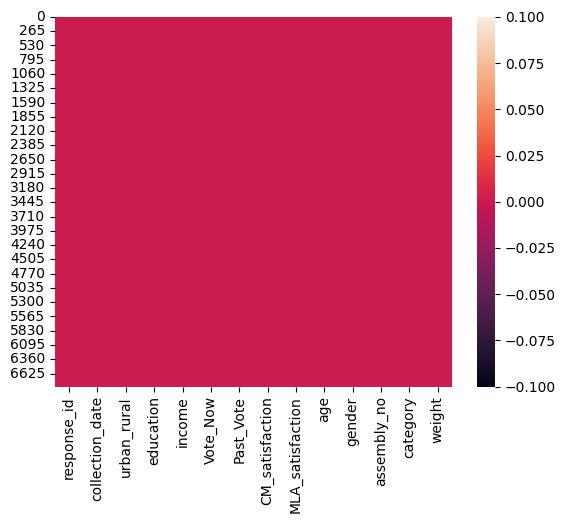

In [7]:
sns.heatmap(survey.isnull())
plt.show()

In [8]:
survey['collection_date'].value_counts(ascending=True)

5-31-2017     557
5-30-2017     582
5-26-2017     598
6-1-2017      607
5-29-2017     620
5-27-2017     665
5-28-2017     761
5-25-2017     998
5-24-2017    1479
Name: collection_date, dtype: int64

In [9]:
survey['collection_date'].value_counts().mean()

763.0

In [10]:
survey['age'].unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', '24ko', '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

In [11]:
len(survey['age'].unique())
survey['age'].unique().size
survey['age'].value_counts().size
len(survey['age'].value_counts())
survey['age'].nunique()

60

In [12]:
# survey.replace({"24ko" : 24}, inplace=True)
survey.replace(to_replace="24ko", value="24", inplace=True)

In [13]:
survey['age'].value_counts()

25    598
24    450
30    440
28    396
22    392
26    389
27    360
20    328
23    317
21    311
32    263
35    263
29    239
40    177
34    173
19    171
31    159
33    143
38    135
36    127
18    125
42    104
37     90
45     82
43     72
39     69
50     60
44     54
41     54
48     35
47     34
46     32
49     27
52     24
51     23
55     20
60     15
61     12
53     12
54     11
57     10
56      9
58      9
64      8
67      7
59      5
65      5
62      5
66      4
68      4
63      4
70      3
71      2
74      1
69      1
99      1
72      1
75      1
76      1
Name: age, dtype: int64

In [14]:
survey['age'] = survey['age'].astype(int)

In [15]:
survey[survey['age'] < 45].shape

(6399, 14)

In [16]:
len(survey[survey['age'] < 45]) / survey['age'].size * 100

93.18479685452162

In [17]:
df = survey.copy()

In [18]:
df.insert(10, 'age_group', survey['age'])

In [19]:
df1 = df[(df['age_group'] >= 18) & (df['age_group'] < 25)]

In [20]:
df1['age_group'].unique()

array([22, 23, 24, 19, 21, 18, 20])

In [21]:
df1['age_group'] = '18-25'

<ipython-input-21-3bfaab5ac91c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_group'] = '18-25'


In [22]:
df2 = df[(df['age_group'] >= 25) & (df['age_group'] < 40)]

In [23]:
df2['age_group'].unique()

array([26, 34, 25, 36, 38, 29, 30, 39, 37, 32, 27, 28, 35, 31, 33])

In [24]:
df2['age_group'] = '25-40'

<ipython-input-24-51749148ae3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age_group'] = '25-40'


In [25]:
df3 = df[(df['age_group'] >= 40) & (df['age_group'] < 55)]

In [26]:
df3['age_group'].unique()

array([42, 51, 44, 53, 48, 45, 40, 49, 46, 43, 41, 50, 54, 47, 52])

In [27]:
df3['age_group'] = '40-55'

<ipython-input-27-bbaa45be74b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['age_group'] = '40-55'


In [28]:
df4 = df[df['age_group'] >= 55]

In [29]:
df4['age_group'].unique()

array([74, 70, 58, 56, 55, 62, 60, 59, 61, 66, 57, 67, 65, 71, 63, 64, 68,
       69, 99, 72, 75, 76])

In [30]:
df4['age_group'] = '55+'

<ipython-input-30-f56045c0f8f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['age_group'] = '55+'


In [31]:
df = pd.concat([df1, df2, df3, df4])

In [32]:
df.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477
14,15,5-24-2017,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477
16,17,5-24-2017,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738
18,19,5-24-2017,Rural,Graduate,"₹ 30,000 - ₹ 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519


In [33]:
df['age_group'].value_counts()

25-40    3844
18-25    2094
40-55     801
55+       128
Name: age_group, dtype: int64

In [34]:
df[(df['Vote_Now'] == 'RJD') & (df['Past_Vote'] == 'RJD')]

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
16,17,5-24-2017,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738
38,39,5-24-2017,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Can’t say,Can’t say,22,18-25,Male,181,SC,1.596987
47,48,5-24-2017,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,20,18-25,Male,172,BC,1.188838
85,86,5-24-2017,Rural,12th Pass,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,22,18-25,Male,187,BC,0.586158
120,121,5-24-2017,Rural,Graduate,"₹ 1,50,000 & above",RJD,RJD,Fully Satisfied,Fully Satisfied,23,18-25,Male,187,BC,0.891022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,4754,5-26-2017,Rural,Post - Graduation,"₹ 30,000 - ₹ 50,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,61,55+,Male,16,BC,4.650280
5493,5494,5-26-2017,Urban,Graduate,"₹ 30,000 - ₹ 50,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,61,55+,Male,156,Gen,1.044473
5687,5688,5-29-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,62,55+,Male,156,EBC,10.814150
5830,5831,5-30-2017,Urban,Graduate,"₹ 50,000 - ₹ 80,000",RJD,RJD,Somewhat Dissatisfied,Fully Dissatisfied,59,55+,Male,48,Gen,2.359308
